In [3]:
import requests

In [4]:
requ = requests.get("https://en.wikipedia.org/wiki/Harvard_University")

In [5]:
dir(requ)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [6]:
page = requ.text

In [11]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page, 'xml')

In [12]:
soup.title

<title>Harvard University - Wikipedia</title>

In [13]:
soup.table["class"]

'infobox vcard'

In [14]:
[t["class"] for t in soup.find_all("table") if t.get("class")]

['infobox vcard',
 'toccolours',
 'box-Expand_section plainlinks metadata ambox mbox-small-left ambox-content',
 'infobox',
 'wikitable sortable collapsible collapsed floatright',
 'wikitable sortable collapsible collapsed floatright',
 'wikitable',
 'box-Cleanup-gallery plainlinks metadata ambox ambox-style',
 'metadata mbox-small',
 'nowraplinks collapsible collapsed navbox-inner',
 'nowraplinks navbox-subgroup',
 'nowraplinks navbox-subgroup',
 'nowraplinks collapsible collapsed navbox-inner',
 'nowraplinks collapsible autocollapse navbox-inner',
 'nowraplinks collapsible collapsed navbox-inner',
 'nowraplinks collapsible autocollapse navbox-inner',
 'nowraplinks collapsible autocollapse navbox-inner',
 'nowraplinks collapsible autocollapse navbox-inner',
 'nowraplinks collapsible autocollapse navbox-inner',
 'nowraplinks collapsible autocollapse navbox-inner',
 'nowraplinks collapsible autocollapse navbox-inner',
 'nowraplinks hlist collapsible autocollapse navbox-inner',
 'nowrapl

In [15]:
table_html = str(soup.find_all("table", "wikitable")[2])

In [16]:
from IPython.core.display import HTML
HTML(table_html)

In [17]:
rows = [row for row in soup.find_all("table", "wikitable")[2].find_all("tr")]

In [18]:
rem_nl = lambda s: s.replace("\n", "")

In [19]:
columns = [rem_nl(col.get_text()) for col in rows[0].find_all("th") if col.get_text()]
columns

['Undergrad', 'Graduate', 'U.S. census']

In [20]:
indexes = [rem_nl(row.find("th").get_text()) for row in rows[1:]]
indexes

['Asian/Pacific Islander',
 'Black/non-Hispanic',
 'Hispanics of any race',
 'White/non-Hispanic',
 'Mixed race/other',
 'International students']

In [21]:
to_num = lambda s: s[-1] =="%" and int(s[:-1]) or None 

In [22]:
values = [to_num(rem_nl(value.get_text())) for row in rows[1:] for value in row.find_all("td")]
values

[17, 11, 5, 6, 4, 12, 9, 5, 16, 46, 43, 64, 10, 8, 9, 11, 27, None]

In [23]:
stacked_values = zip(*[values[i::3] for i in range(len(columns))])
list(stacked_values)

[(17, 11, 5), (6, 4, 12), (9, 5, 16), (46, 43, 64), (10, 8, 9), (11, 27, None)]

In [24]:
import pandas as pd
stacked_values = zip(*[values[i::3] for i in range(len(columns))])
df = pd.DataFrame(stacked_values, columns=columns, index=indexes)
df

,Undergrad,Graduate,U.S. census
Asian/Pacific Islander,17,11,5.0
Black/non-Hispanic,6,4,12.0
Hispanics of any race,9,5,16.0
White/non-Hispanic,46,43,64.0
Mixed race/other,10,8,9.0
International students,11,27,NaN


In [25]:
columns = [rem_nl(col.get_text()) for col in rows[0].find_all("th") if col.get_text()] 
stacked_values = zip(*[values[i::3] for i in range(len(columns))])
data_dicts = [{col: val for col, val in zip(columns,col_values)} for col_values in stacked_values]
data_dicts

[{'Undergrad': 17, 'Graduate': 11, 'U.S. census': 5},
 {'Undergrad': 6, 'Graduate': 4, 'U.S. census': 12},
 {'Undergrad': 9, 'Graduate': 5, 'U.S. census': 16},
 {'Undergrad': 46, 'Graduate': 43, 'U.S. census': 64},
 {'Undergrad': 10, 'Graduate': 8, 'U.S. census': 9},
 {'Undergrad': 11, 'Graduate': 27, 'U.S. census': None}]

In [26]:
df.dropna()

,Undergrad,Graduate,U.S. census
Asian/Pacific Islander,17,11,5.0
Black/non-Hispanic,6,4,12.0
Hispanics of any race,9,5,16.0
White/non-Hispanic,46,43,64.0
Mixed race/other,10,8,9.0


In [27]:
dfnew = df.fillna(0).astype(int)
dfnew

,Undergrad,Graduate,U.S. census
Asian/Pacific Islander,17,11,5
Black/non-Hispanic,6,4,12
Hispanics of any race,9,5,16
White/non-Hispanic,46,43,64
Mixed race/other,10,8,9
International students,11,27,0


In [28]:
import numpy as np
dfnew.values

array([[17, 11,  5],
       [ 6,  4, 12],
       [ 9,  5, 16],
       [46, 43, 64],
       [10,  8,  9],
       [11, 27,  0]])

In [29]:
np.mean(dfnew.Undergrad)
dfnew['Undergrad']

Asian/Pacific Islander    17
Black/non-Hispanic         6
Hispanics of any race      9
White/non-Hispanic        46
Mixed race/other          10
International students    11
Name: Undergrad, dtype: int32

In [30]:
dfnew.loc["Asian/Pacific Islander"]

Undergrad      17
Graduate       11
U.S. census     5
Name: Asian/Pacific Islander, dtype: int32

In [31]:
dfnew.loc["Asian/Pacific Islander","Graduate"]


11

In [32]:
seq_table = dfnew.stack().reset_index()
seq_table.columns = ["race", "source", "percentage"]
seq_table

,race,source,percentage
0,Asian/Pacific Islander,Undergrad,17
1,Asian/Pacific Islander,Graduate,11
2,Asian/Pacific Islander,U.S. census,5
3,Black/non-Hispanic,Undergrad,6
4,Black/non-Hispanic,Graduate,4
5,Black/non-Hispanic,U.S. census,12
6,Hispanics of any race,Undergrad,9
7,Hispanics of any race,Graduate,5
8,Hispanics of any race,U.S. census,16
9,White/non-Hispanic,Undergrad,46


In [33]:
grouped_data = seq_table.groupby("race")
grouped_data.groups

{'Asian/Pacific Islander': Int64Index([0, 1, 2], dtype='int64'),
 'Black/non-Hispanic': Int64Index([3, 4, 5], dtype='int64'),
 'Hispanics of any race': Int64Index([6, 7, 8], dtype='int64'),
 'International students': Int64Index([15, 16, 17], dtype='int64'),
 'Mixed race/other': Int64Index([12, 13, 14], dtype='int64'),
 'White/non-Hispanic': Int64Index([9, 10, 11], dtype='int64')}

In [34]:
mean_table = grouped_data.mean()
mean_table

,percentage
race,
Asian/Pacific Islander,11.000000
Black/non-Hispanic,7.333333
Hispanics of any race,10.000000
International students,12.666667
Mixed race/other,9.000000
White/non-Hispanic,51.000000


In [35]:
for name, group in seq_table.groupby("source", sort=True):
  print(name)
  print(group)


Graduate
                      race    source  percentage
1   Asian/Pacific Islander  Graduate          11
4       Black/non-Hispanic  Graduate           4
7    Hispanics of any race  Graduate           5
10      White/non-Hispanic  Graduate          43
13        Mixed race/other  Graduate           8
16  International students  Graduate          27
U.S. census
                      race       source  percentage
2   Asian/Pacific Islander  U.S. census           5
5       Black/non-Hispanic  U.S. census          12
8    Hispanics of any race  U.S. census          16
11      White/non-Hispanic  U.S. census          64
14        Mixed race/other  U.S. census           9
17  International students  U.S. census           0
Undergrad
                      race     source  percentage
0   Asian/Pacific Islander  Undergrad          17
3       Black/non-Hispanic  Undergrad           6
6    Hispanics of any race  Undergrad           9
9       White/non-Hispanic  Undergrad          46
12        Mi

In [36]:
get_ipython().run_line_magic('matplotlib', 'inline')

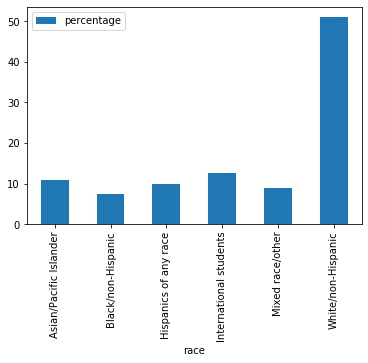

In [37]:
mean_table.plot(kind="bar")